In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [8]:
plt.style.use('fivethirtyeight')
file = '/kaggle/input/fuel-prices/weekly_fuel_prices_from_2005_to_20240419.csv'

df = pd.read_csv(file)
df.head()

,SURVEY_DATE,EURO-SUPER_95
0,1/3/2005,1115.75
1,1/10/2005,1088.00
2,1/17/2005,1088.14
3,1/24/2005,1090.01
4,1/31/2005,1132.11


In [9]:
df['SURVEY_DATE'] = pd.DatetimeIndex(df['SURVEY_DATE'])
df.dtypes
df = df.rename(columns={'SURVEY_DATE': 'ds',
                        'EURO-SUPER_95': 'y'})



df.head()

,ds,y
0,2005-01-03,1115.75
1,2005-01-10,1088.00
2,2005-01-17,1088.14
3,2005-01-24,1090.01
4,2005-01-31,1132.11


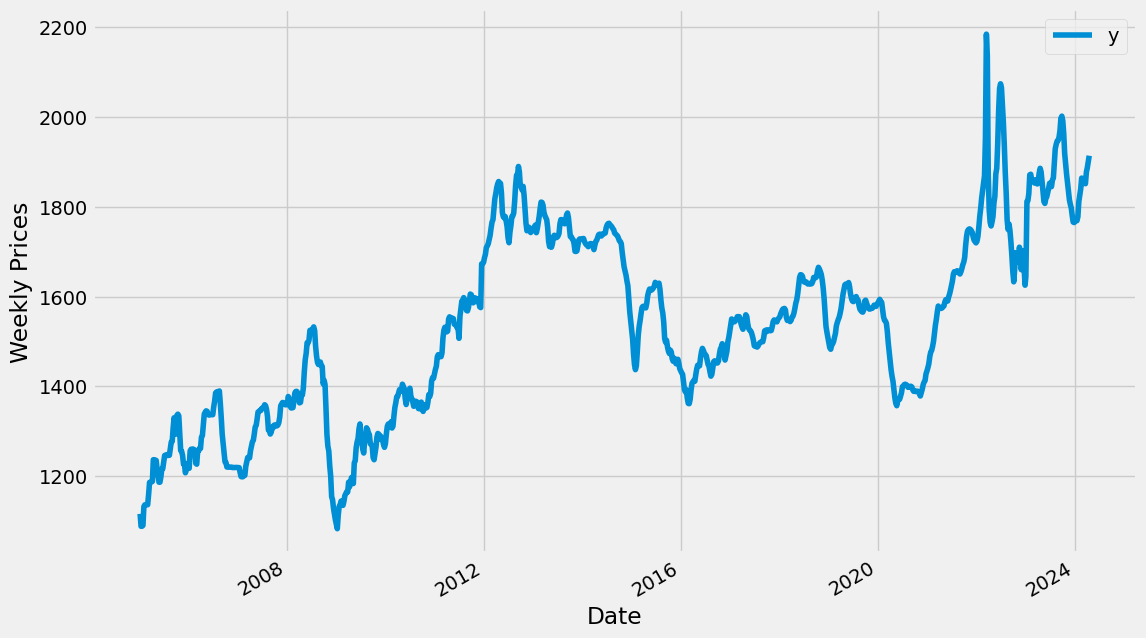

In [11]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Weekly Prices')
ax.set_xlabel('Date')

plt.show()

In [14]:
future_dates = pd.date_range(start='2024-04-15', periods=100,freq='W')
future = pd.DataFrame({'ds': future_dates})

future.head()

,ds
0,2024-04-21
1,2024-04-28
2,2024-05-05
3,2024-05-12
4,2024-05-19


In [ ]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.1, 0.5,1],
    'seasonality_prior_scale': [1, 10, 30],
}


# Helper function to evaluate the model
def evaluate_model(model, metric_func):
    df_cv = cross_validation(model, initial='56 days', period='28 days', horizon='7 days')
    return metric_func(df_cv['y'], df_cv['yhat'])


# Grid search
best_params = {}
best_score = float('inf')


for mode in param_grid['seasonality_mode']:
    for cps in param_grid['changepoint_prior_scale']:
        for sps in param_grid['seasonality_prior_scale']:
            # Create a model with the current hyperparameters
            model = Prophet(seasonality_mode=mode, changepoint_prior_scale=cps, seasonality_prior_scale=sps)
            model.fit(df)

            # Evaluate the model using Mean Absolute Error (MAE)
            score = evaluate_model(model, mean_absolute_error)

            # Update best parameters if necessary
            if score < best_score:
                best_score = score
                best_params = {
                    'seasonality_mode': mode,
                    'changepoint_prior_scale': cps,
                    'seasonality_prior_scale': sps
                }

print(best_params)
print(best_score)

# Create the best model with the optimal hyperparameters
best_model = Prophet(**best_params)
best_model.fit(df)

In [20]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have created and fitted your Prophet model
  # Assuming df is your DataFrame with 'ds' and 'y' columns

horizon = '56 days'
period = '28 days'
initial = '7 days'

best_model = Prophet(seasonality_mode=mode, changepoint_prior_scale=cps, seasonality_prior_scale=sps)
best_model.fit(df)

# Perform cross-validation
df_cv = cross_validation(best_model, horizon=horizon, period=period, initial=initial)

# Calculate performance metrics
df_p = performance_metrics(df_cv, rolling_window=0.1)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(df_cv)


20:28:14 - cmdstanpy - INFO - Chain [1] start processing
20:28:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/250 [00:00<?, ?it/s]

20:28:16 - cmdstanpy - INFO - Chain [1] start processing
20:28:24 - cmdstanpy - INFO - Chain [1] done processing
20:28:24 - cmdstanpy - INFO - Chain [1] start processing
20:28:34 - cmdstanpy - INFO - Chain [1] done processing
20:28:34 - cmdstanpy - INFO - Chain [1] start processing
20:28:46 - cmdstanpy - INFO - Chain [1] done processing
20:28:46 - cmdstanpy - INFO - Chain [1] start processing
20:29:00 - cmdstanpy - INFO - Chain [1] done processing
20:29:00 - cmdstanpy - INFO - Chain [1] start processing
20:29:17 - cmdstanpy - INFO - Chain [1] done processing
20:29:17 - cmdstanpy - INFO - Chain [1] start processing
20:29:36 - cmdstanpy - INFO - Chain [1] done processing
20:29:36 - cmdstanpy - INFO - Chain [1] start processing
20:29:59 - cmdstanpy - INFO - Chain [1] done processing
20:29:59 - cmdstanpy - INFO - Chain [1] start processing
20:30:22 - cmdstanpy - INFO - Chain [1] done processing
20:30:22 - cmdstanpy - INFO - Chain [1] start processing
20:30:52 - cmdstanpy - INFO - Chain [1]

Mean Absolute Error: 1324.50
Mean Squared Error: 104035903.13
Root Mean Squared Error: 10199.80
             ds         yhat   yhat_lower   yhat_upper        y     cutoff
0    2005-01-24 -2458.582459 -2458.582704 -2458.582281  1090.01 2005-01-17
1    2005-01-31 -6320.890003 -6320.892050 -6320.888403  1132.11 2005-01-17
2    2005-02-07 -5111.367147 -5111.370622 -5111.363972  1135.87 2005-01-17
3    2005-02-14  1546.914531  1546.912954  1546.916293  1135.88 2005-01-17
4    2005-02-21  8806.028650  8806.015177  8806.043782  1136.04 2005-01-17
...         ...          ...          ...          ...      ...        ...
1919 2024-03-18  2031.552726  1956.709547  2110.999007  1851.39 2024-02-19
1920 2024-03-25  2026.420888  1952.034100  2102.328432  1877.18 2024-02-19
1921 2024-04-01  2017.586775  1937.011254  2095.124579  1887.20 2024-02-19
1922 2024-04-08  2015.591176  1934.628238  2093.024142  1900.79 2024-02-19
1923 2024-04-15  2023.492376  1942.992675  2101.513118  1913.74 2024-02-19

[19

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


[1882.0, 1892.0, 1893.0, 1892.0, 1895.0, 1904.0, 1915.0, 1923.0, 1928.0, 1933.0, 1939.0, 1945.0, 1947.0, 1946.0, 1942.0, 1938.0, 1934.0, 1931.0, 1929.0, 1930.0, 1932.0, 1931.0, 1926.0, 1920.0, 1917.0, 1917.0, 1916.0, 1910.0, 1900.0, 1893.0, 1890.0, 1891.0, 1888.0, 1882.0, 1876.0, 1877.0, 1885.0, 1896.0, 1906.0, 1914.0, 1922.0, 1929.0, 1936.0, 1944.0, 1956.0, 1974.0, 1992.0, 2003.0, 2002.0, 1994.0, 1990.0, 1998.0, 2014.0, 2025.0, 2028.0, 2026.0, 2028.0, 2037.0, 2048.0, 2058.0, 2063.0, 2068.0, 2074.0, 2081.0, 2084.0, 2083.0, 2079.0, 2074.0, 2070.0, 2066.0, 2064.0, 2064.0, 2066.0, 2065.0, 2061.0, 2054.0, 2050.0, 2049.0, 2048.0, 2042.0, 2032.0, 2023.0, 2020.0, 2020.0, 2018.0, 2011.0, 2005.0, 2004.0, 2011.0, 2023.0, 2033.0, 2042.0, 2050.0, 2058.0, 2066.0, 2073.0, 2085.0, 2102.0, 2123.0, 2136.0]


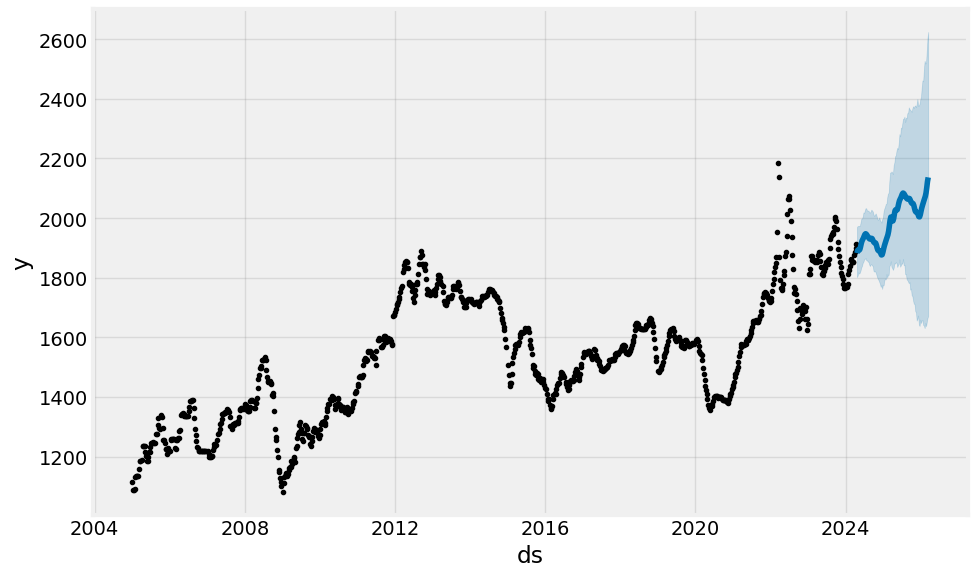

In [21]:
forecast = best_model.predict(future[['ds']])

# Visualize the forecast
fig = best_model.plot(forecast)
forecast[['ds', 'yhat']]
print(forecast['yhat'].round().tolist())